In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import cv2
from scipy import spatial
import util
import palm_subtraction as PS

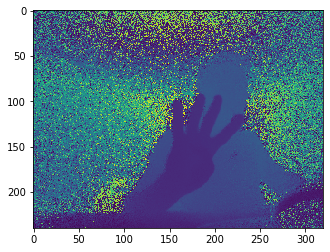

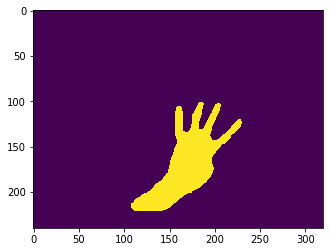

In [101]:
# file = "data/acquisitions/S1/G8/26-color.png"
# file = "\senz3d_dataset\senz3d_dataset\\acquisitions\S1\G8\\26-color.png"
file = "D:\myJupyterWorkspace\\myCV\\finger_detection\\senz3d_dataset\\senz3d_dataset\\acquisitions\\S1\\G8\\26-color.png"

train_image = cv2.imread(file, cv2.IMREAD_COLOR)

depth_img = util.read_depth_map(file[:-9] + 'depth.bin')

# Clean depth image of noise
bin_img = PS.clean_image(depth_img)
plt.figure(1)
plt.imshow(depth_img)
plt.figure(2)
plt.imshow(bin_img)
plt.show()


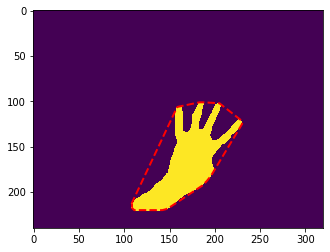

In [86]:
points_x, points_y = np.where(bin_img == 255)
points = np.c_[ points_y, points_x ]
from scipy import spatial
hull = spatial.ConvexHull(points)


plt.imshow(bin_img)
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(np.array([points[hull.vertices,0][-1], points[hull.vertices,0][0]]), 
         np.array([points[hull.vertices,1][-1], points[hull.vertices,1][0]]), 'r--', lw=2)
plt.show()

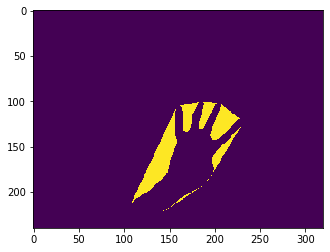

In [87]:
outline = np.c_[ points[hull.vertices,0], points[hull.vertices,1] ]
mask = np.zeros((bin_img.shape))
mask = cv2.fillPoly(mask, [np.int32(outline)], (255, 255, 255))
plt.imshow(mask)

triangles = mask - bin_img
plt.imshow(triangles)

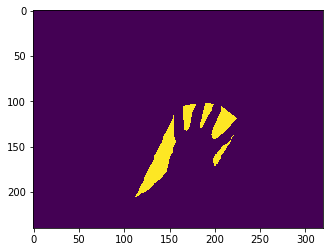

In [88]:
kernel = np.ones((3,3), dtype = 'uint8')
img_out = cv2.erode(triangles, kernel)  

plt.imshow(img_out)

In [95]:
def label(binary_image):
    _, lab_im = cv2.connectedComponents(binary_image)     
    return lab_im

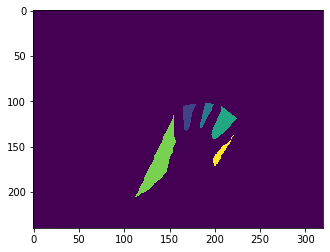

In [100]:
labeled_img = label(img_out.astype('uint8'))
plt.imshow(labeled_img)
# plt.colorbar()

In [98]:
def process_triangle(img_in): 

    blurred = gaussian_filter(img_in, sigma=3)
    return blurred

def detect_corners(blurred):
    plt.imshow(blurred)
    plt.show()
    dst = cv2.cornerHarris(blurred,10,3,0.06)
    dst = cv2.dilate(dst,None)
    
    img_out = np.zeros(blurred.shape)
    img_out[dst>0.01*dst.max()] = 255
    return label(img_out.astype('uint8'))


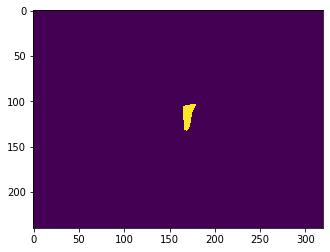

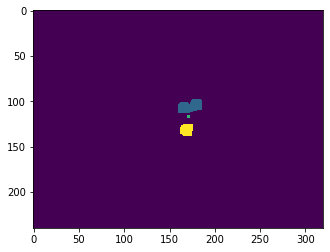

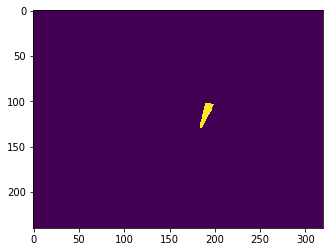

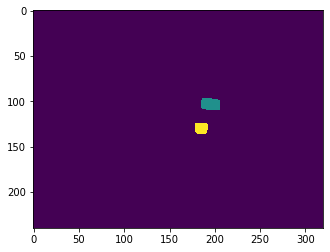

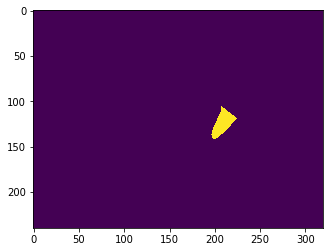

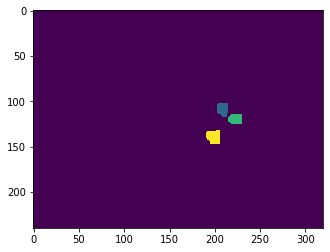

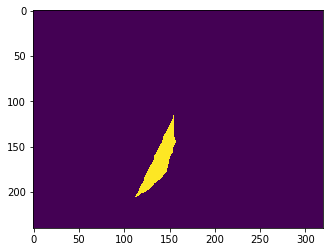

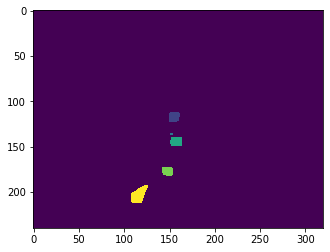

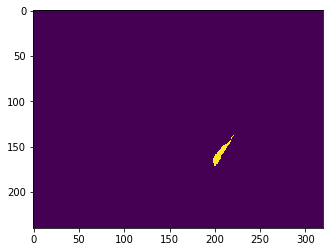

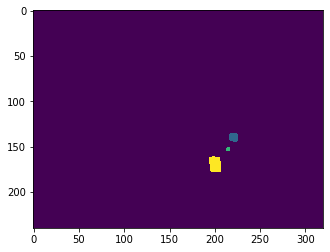

In [99]:
## rescale image
# factor = 3
# big_size = (labeled_img.shape[1]* factor, labeled_img.shape[0] * factor)
# print(big_size)
# labeled_img = cv2.resize(labeled_img.astype('uint8'), (labeled_img.shape[1]* factor, labeled_img.shape[0] * factor)) 
# plt.imshow(labeled_img)


for i in np.unique(labeled_img)[1:]:
    img_tri1 = labeled_img.copy()
    img_tri1 = img_tri1 == i
    img_tri1 = img_tri1.astype('uint8')* 255   
    
#     img_tri1 = process_triangle(img_tri1)
    img_points = detect_corners(img_tri1)
    plt.imshow(img_points)
    plt.show()    